### Importing the important libraries

In [ ]:
import pandas as pd
import numpy as np

### Reading the spam email classification csv file

In [ ]:
df = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.head().info

<bound method DataFrame.info of   Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]>

## Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Assuming the column with words is named "text"
df = df.dropna(subset=["text"])

# Separate the features (words) and the target variable (spam)
X = df.drop(["Email No.", "Prediction"], axis=1)  # Exclude Email_no. and spam columns
y = df["Prediction"]

# Perform feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=1500)  # Select top 1500 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Create a new dataframe with the selected features
df_selected = df[["Email No.", "Prediction"] + selected_feature_names]

# Print the shape of the new dataframe
print("New dataframe shape:", df_selected.shape)


New dataframe shape: (5172, 1502)


## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4137, 3000)
X_test shape: (1035, 3000)
y_train shape: (4137,)
y_test shape: (1035,)


## Checking the model's accuracy of test data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Fit the model on the training data
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict probabilities for the test data
probs = model.predict_proba(X_test)

# Predict labels for the test data
predicted_labels = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9545893719806763


## Plotting ROC-AUC Curve

AUC Score: 0.9793548623047947


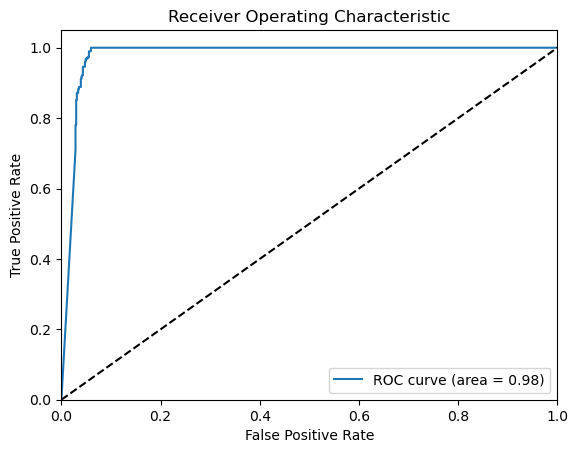

In [ ]:
# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line indicating random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Plotting Confusion Matrix

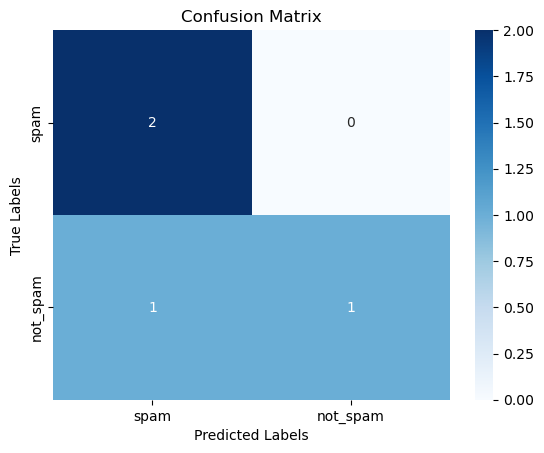

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example predicted labels
predicted_labels = np.array(['spam', 'not-spam', 'spam', 'not_spam', 'spam'])

# Example true labels
true_labels = np.array(['spam', 'not_spam', 'not_spam', 'not_spam', 'spam'])

# Define the classes and the order of the confusion matrix
classes = ['spam', 'not_spam']

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Using Support Vector Classifier (SVC) from scikit-learn

### Accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example feature vectors (X) and labels (y)
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array(['spam', 'not_spam', 'spam', 'not_spam', 'spam'])

# Create an instance of Support Vector Machine (SVM) classifier
model = SVC(kernel='linear')  # You can choose different kernel functions (e.g., 'linear', 'rbf', 'poly', etc.)

# Fit the model to the training data
model.fit(X, y)

# Predict labels for the same data
predicted_labels = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predicted_labels)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.6


# ****For K-Nearest Neighbors (KNN):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example feature vectors (X) and labels (y)
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array(['spam', 'not_spam', 'spam', 'not_spam', 'spam'])

# Create an instance of K-Nearest Neighbors (KNN) classifier
model = KNeighborsClassifier(n_neighbors=3)  # You can specify the number of neighbors (k) here

# Fit the model to the training data
model.fit(X, y)

# Predict labels for the same data
predicted_labels = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predicted_labels)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.4


### Confusion Matrix

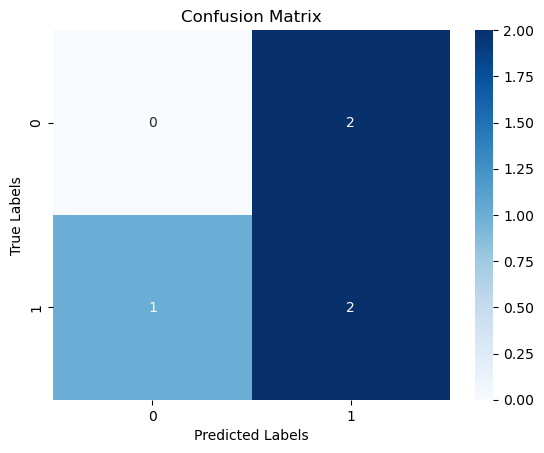

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y, predicted_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
